
# **Part II: Feature Engineering**
### **Step 1: Import the following libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Step 2: Read the CSV from Part I**
We'll now read the CSV that we got from Part I as a DataFrame.

In [2]:
Car_df = pd.read_csv("/content/Data_Onepark2.csv")

In [3]:
Car_df

,vacancy,lastupdate
0,126,2021-04-01 00:13:00
1,126,2021-04-01 00:27:00
2,126,2021-04-01 00:43:00
3,126,2021-04-01 00:57:00
4,126,2021-04-01 01:11:00
...,...,...
6885,96,2021-06-17 09:11:05
6886,95,2021-06-17 09:27:05
6887,97,2021-06-17 09:41:05
6888,90,2021-06-17 09:57:06


In [4]:
Car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6890 entries, 0 to 6889
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   vacancy     6890 non-null   int64 
 1   lastupdate  6890 non-null   object
dtypes: int64(1), object(1)
memory usage: 107.8+ KB


### **Step 3: Turn the strings in 'lastupdate' column into a DataTime object**
Next, we will get additional information from the "lastupdate", i.e. dayofweek, hour, minute. 


In [5]:
Car_df['lastupdate'] = pd.to_datetime(Car_df['lastupdate'])
Car_df['lastupdate'] 

0      2021-04-01 00:13:00
1      2021-04-01 00:27:00
2      2021-04-01 00:43:00
3      2021-04-01 00:57:00
4      2021-04-01 01:11:00
               ...        
6885   2021-06-17 09:11:05
6886   2021-06-17 09:27:05
6887   2021-06-17 09:41:05
6888   2021-06-17 09:57:06
6889   2021-06-17 10:11:06
Name: lastupdate, Length: 6890, dtype: datetime64[ns]

In [6]:
Car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6890 entries, 0 to 6889
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   vacancy     6890 non-null   int64         
 1   lastupdate  6890 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 107.8 KB


### **Step 4: Get 'dayofweek', 'minute', and 'hour from 'lastupdate' column**

We will be creating new three new columns with:
1. day_of_week - day of the week, i.e. 0 (Monday) - 6 (Sunday)
2. hour - hour in day
3. minute - minute in day

In [7]:
Car_df['Day of Week'] = Car_df['lastupdate'].apply(lambda x:x.dayofweek)
Car_df['Hour'] = Car_df['lastupdate'].apply(lambda x:x.hour)
Car_df['Minute'] = Car_df['lastupdate'].apply(lambda x:x.minute)

In [8]:
Car_df

,vacancy,lastupdate,Day of Week,Hour,Minute
0,126,2021-04-01 00:13:00,3,0,13
1,126,2021-04-01 00:27:00,3,0,27
2,126,2021-04-01 00:43:00,3,0,43
3,126,2021-04-01 00:57:00,3,0,57
4,126,2021-04-01 01:11:00,3,1,11
...,...,...,...,...,...
6885,96,2021-06-17 09:11:05,3,9,11
6886,95,2021-06-17 09:27:05,3,9,27
6887,97,2021-06-17 09:41:05,3,9,41
6888,90,2021-06-17 09:57:06,3,9,57


### **Step 5: Form a new feature called 'Holiday' to check whether the given date is a HK public holiday**


In [9]:
pip install holidays

In [10]:
import holidays

In [11]:
ho_dates= []

for date in holidays.HongKong(years=2021).items():
  ho_dates.append(str(date[0]))

In [12]:
ho_dates

['2021-01-01',
 '2021-02-12',
 '2021-02-13',
 '2021-02-15',
 '2021-04-05',
 '2021-04-02',
 '2021-04-03',
 '2021-04-06',
 '2021-05-19',
 '2021-05-01',
 '2021-06-14',
 '2021-07-01',
 '2021-09-22',
 '2021-10-01',
 '2021-10-14',
 '2021-12-25',
 '2021-12-27']

In [13]:
Boolean_holiday =[]

for i, d in enumerate(Car_df['lastupdate']):
  if str(d.date()) in ho_dates: Boolean_holiday.append(1)
  else: Boolean_holiday.append(0)

In [14]:
Car_df['Holiday'] = Boolean_holiday

In [15]:
Car_df

,vacancy,lastupdate,Day of Week,Hour,Minute,Holiday
0,126,2021-04-01 00:13:00,3,0,13,0
1,126,2021-04-01 00:27:00,3,0,27,0
2,126,2021-04-01 00:43:00,3,0,43,0
3,126,2021-04-01 00:57:00,3,0,57,0
4,126,2021-04-01 01:11:00,3,1,11,0
...,...,...,...,...,...,...
6885,96,2021-06-17 09:11:05,3,9,11,0
6886,95,2021-06-17 09:27:05,3,9,27,0
6887,97,2021-06-17 09:41:05,3,9,41,0
6888,90,2021-06-17 09:57:06,3,9,57,0


In [16]:
Car_df[Car_df['Holiday']==1]

,vacancy,lastupdate,Day of Week,Hour,Minute,Holiday
95,124,2021-04-02 00:13:00,4,0,13,1
96,126,2021-04-02 00:27:00,4,0,27,1
97,127,2021-04-02 00:41:00,4,0,41,1
98,127,2021-04-02 00:57:00,4,0,57,1
99,127,2021-04-02 01:11:00,4,1,11,1
...,...,...,...,...,...,...
6653,121,2021-06-14 22:57:05,0,22,57,1
6654,122,2021-06-14 23:11:04,0,23,11,1
6655,123,2021-06-14 23:27:05,0,23,27,1
6656,125,2021-06-14 23:43:05,0,23,43,1


### **Step 6: Check if there's any missing data**


In [17]:
Car_df.isnull().sum()

vacancy        0
lastupdate     0
Day of Week    0
Hour           0
Minute         0
Holiday        0
dtype: int64

### **Step 7: Export our DataFrame as CSV for next part (if needed)**


In [18]:
Car_df.to_csv("Car_df_part2.csv",index=False)


# **Part III: Exploratory Data Analysis (EDA) and Visualization**
### **Step 1: Import libraries needed for visualization**

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
Car_df.set_index('lastupdate', inplace = True)

In [21]:
Car_df

,vacancy,Day of Week,Hour,Minute,Holiday
lastupdate,,,,,
2021-04-01 00:13:00,126,3,0,13,0
2021-04-01 00:27:00,126,3,0,27,0
2021-04-01 00:43:00,126,3,0,43,0
2021-04-01 00:57:00,126,3,0,57,0
2021-04-01 01:11:00,126,3,1,11,0
...,...,...,...,...,...
2021-06-17 09:11:05,96,3,9,11,0
2021-06-17 09:27:05,95,3,9,27,0
2021-06-17 09:41:05,97,3,9,41,0


### **Step 2: Plot 'Vacancy vs Time'**


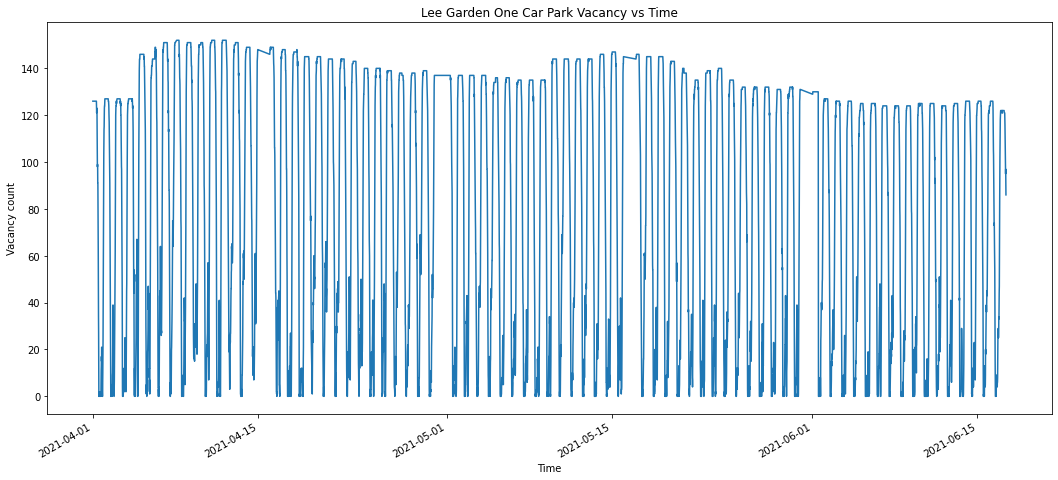

In [22]:
# Step 3: Plot vacancy vs time
fig = plt.figure(figsize= (18,8))
plt.plot(Car_df["vacancy"])
plt.xlabel("Time")
plt.ylabel("Vacancy count")
plt.title("Lee Garden One Car Park Vacancy vs Time")
fig.autofmt_xdate()
# save figure
fig.savefig('Vacancy to time.eps')

### **Step 3: Group by Day of week, Hour and Minute**


In [23]:
Car_df.groupby(['Day of Week','Hour'])['vacancy'].sum()

Day of Week  Hour
0            0       5583
             1       5590
             2       5595
             3       5596
             4       5322
                     ... 
6            19        51
             20      1188
             21      3611
             22      5279
             23      5638
Name: vacancy, Length: 168, dtype: int64

In [24]:
Car_df[Car_df['Day of Week']==5].groupby(['Day of Week','Hour'])['vacancy'].sum()

Day of Week  Hour
5            0       5801
             1       5848
             2       5995
             3       5997
             4       5717
             5       6000
             6       6000
             7       5962
             8       5749
             9       4930
             10      3492
             11      1807
             12       168
             13        29
             14       190
             15       502
             16       584
             17      1075
             18       888
             19       178
             20       841
             21      3096
             22      5127
             23      5476
Name: vacancy, dtype: int64

In [25]:
Car_df.groupby(['Minute'])['vacancy'].sum()

Minute
9        272
11     72030
12     12745
13     57090
25      1625
26      8824
27    130569
28      2184
40       104
41     77072
42     12900
43     51885
55       978
56      9851
57    128224
58      3479
Name: vacancy, dtype: int64

### **Step 4: Factorplot of 'Vacancy' vs 'Day of week'**


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


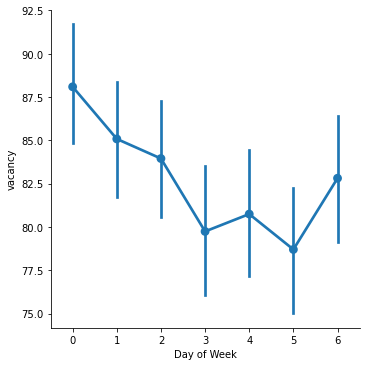

In [26]:
sns.factorplot(data= Car_df, y="vacancy",x="Day of Week")


### **Step 5: Factorplot of 'Vacancy' vs 'Hour'**


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


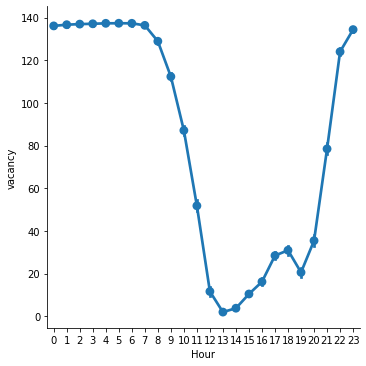

In [27]:
sns.factorplot(data= Car_df, y="vacancy",x="Hour")

### **Step 6: Factorplot of 'Vacancy' vs 'Minute'**


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


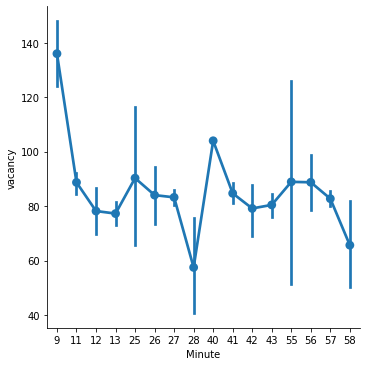

In [28]:
sns.factorplot(data= Car_df, y="vacancy",x="Minute")

### **Step 7: Factorplot of 'Holiday' vs 'Minute'**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


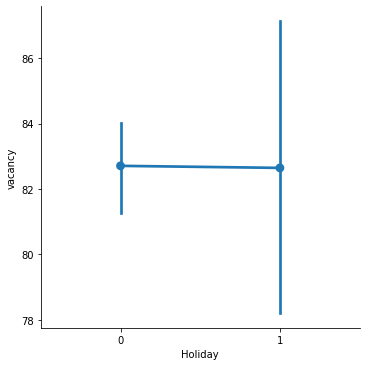

In [29]:
sns.factorplot(data= Car_df, y="vacancy",x="Holiday")

### **Step 8: Correlation analysis**


In [30]:
Car_df.corr()

,vacancy,Day of Week,Hour,Minute,Holiday
vacancy,1.000000,-0.040821,-0.547996,-0.004019,-0.000330
Day of Week,-0.040821,1.000000,-0.004517,-0.002097,-0.096259
Hour,-0.547996,-0.004517,1.000000,0.003886,0.004524
Minute,-0.004019,-0.002097,0.003886,1.000000,0.002107
Holiday,-0.000330,-0.096259,0.004524,0.002107,1.000000


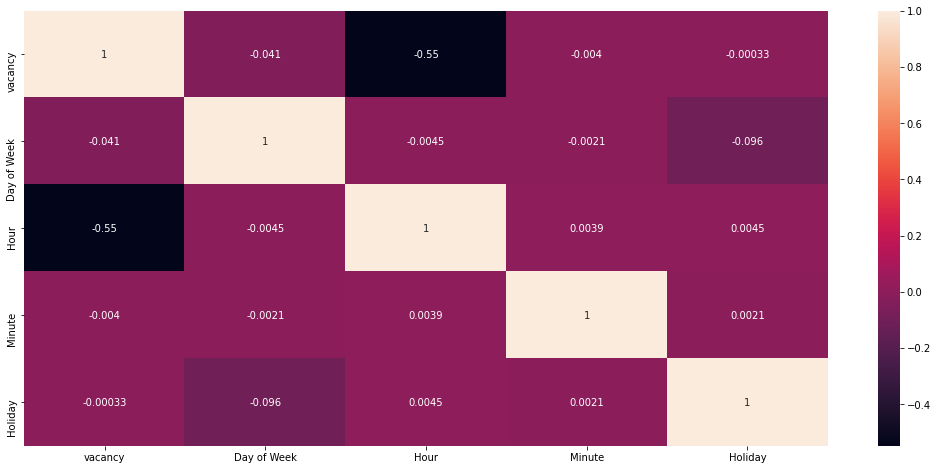

In [31]:
plt.figure(figsize = (18, 8))
sns.heatmap(Car_df.corr(), annot=True)
plt.show()


# **Part IV: Perform Machine Learning**
### Our work include **four** different models:

*   DummyRegressor
*   LinearRegression
*   DecisionTreeRegressor
*   RandomForestRegressor

### We use 'Day of Week' and 'Hour' and 'Holiday' as the features; and 'vacancy' as the target.


### **Step 1: Prepare for independent and dependent variables**

In [32]:
# features
X = Car_df[['Day of Week','Hour','Holiday']]
X

,Day of Week,Hour,Holiday
lastupdate,,,
2021-04-01 00:13:00,3,0,0
2021-04-01 00:27:00,3,0,0
2021-04-01 00:43:00,3,0,0
2021-04-01 00:57:00,3,0,0
2021-04-01 01:11:00,3,1,0
...,...,...,...
2021-06-17 09:11:05,3,9,0
2021-06-17 09:27:05,3,9,0
2021-06-17 09:41:05,3,9,0


In [33]:
# target
y = Car_df['vacancy']
y

lastupdate
2021-04-01 00:13:00    126
2021-04-01 00:27:00    126
2021-04-01 00:43:00    126
2021-04-01 00:57:00    126
2021-04-01 01:11:00    126
                      ... 
2021-06-17 09:11:05     96
2021-06-17 09:27:05     95
2021-06-17 09:41:05     97
2021-06-17 09:57:06     90
2021-06-17 10:11:06     86
Name: vacancy, Length: 6890, dtype: int64

### **Step 2: Import machine learning libraries**

In [34]:
#train_test_split
from sklearn.model_selection import train_test_split

#models
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# evaluation
from sklearn.metrics import mean_squared_error

### **Step 3: Split indepedent and dependent variables into train and test sets**

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 99)

### **Step 4: Train our machine learning models**
In this step we do the following things:
1. Model selection and initialization
2. Declare a variable to store our model in it
3. Fit our training data into the instantiated model
4. Declare a variable that contains predictions from the model we just trained, using the train dataset (X_test)

##### We save all predictions from different model in a list.

In [36]:
Vac_predictions = []

##### **Model 1: DummyRegressor**

In [37]:
dummy = DummyRegressor() #instantiate 
dummy.fit(X_train,y_train) # train

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [38]:
pred_dummy = dummy.predict(X_test)  # prediction
Vac_predictions.append(pred_dummy)

##### **Model 2: LinearRegression**

In [39]:
lr = LinearRegression() #instantiate 
lr.fit(X_train,y_train) # train

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
pred_lr = lr.predict(X_test) # prediction
Vac_predictions.append(pred_lr)

##### **Model 3: DecisionTreeRegressor**

In [41]:
dtr = DecisionTreeRegressor() # instantiate
dtr.fit(X_train,y_train) # train

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [42]:
pred_dtr = dtr.predict(X_test) # prediction
Vac_predictions.append(pred_dtr)

##### **Model 4: RandomForestRegressor**

In [43]:
rfr = RandomForestRegressor() #instantiate
rfr.fit(X_train,y_train) # train

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [44]:
pred_rfr = rfr.predict(X_test) # prediction
Vac_predictions.append(pred_rfr)

In [45]:
len(Vac_predictions)

4

# **Part V: Model performance evaluation**
We use the following two ways to assess our model:

*  Scatter plot comparing the actual values of the dependent variable predictions
*  The root mean-squared-error (RMSE) score




### **Step1: Import the libraries for evaluation**

In [46]:
from sklearn.metrics import mean_squared_error
import numpy as np

### **Step2: Results visualization**

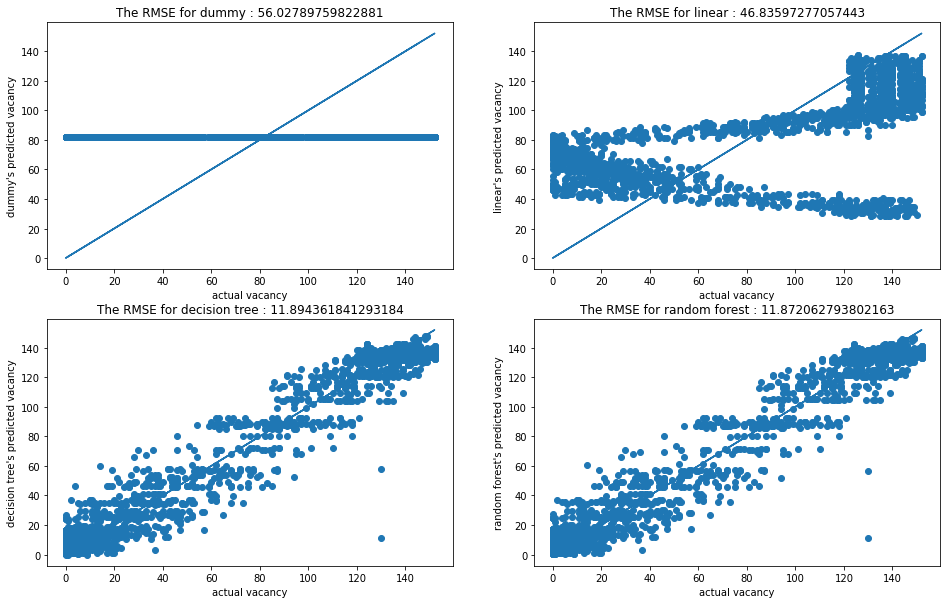

In [47]:
model_names = ['dummy','linear','decision tree','random forest']

fig = plt.figure(figsize=(16,10))

for i , (model_name, y_pred) in enumerate(zip(model_names, Vac_predictions)):
  mse = mean_squared_error(y_test, y_pred)
  ax = fig.add_subplot(2,2,i+1)
  ax.plot(y_test, y_test)
  ax.scatter(y_test, y_pred)
  plt.xlabel('actual vacancy')
  plt.ylabel(f'{model_name}\'s predicted vacancy')
  plt.title(f'The RMSE for {model_name} : {np.sqrt(mse)}')

### **Our result: The model *RandomForestRegressor* has the lowest RMSE**

# **Part VI: Application for our prediction**
### Our model can be used to predict the car park availability at the user’s input time in Lee Garden One Car Park.

### **Input: Collect information from the user**

In [48]:
while True:
  try:
    year, month, date = input('Please input the date (yyyy/mm/dd):').split('/')
    hour, minute = input('Please input the time (hh:mm) e.g. 18:00:').split(':')
    dd_time = pd.to_datetime(f'{year}-{month}-{date} {hour}:{minute}:00')
    break
  except:
    print('Please input a valid datetime.')
  

Please input the date (yyyy/mm/dd):2021/06/13
Please input the time (hh:mm) e.g. 18:00:23:58


In [49]:
# round off the minute to nearest 15 interval
dd_time = dd_time.round(freq = '15T')

In [50]:
user = {}

user['Day of Week'] = dd_time.dayofweek
user['Hour'] = dd_time.hour

if str(dd_time) in ho_dates: user['Holiday'] = [1]
else: user['Holiday'] = [0]

In [51]:
user_df = pd.DataFrame(user)

In [52]:
user_df

,Day of Week,Hour,Holiday
0,0,0,0


In [53]:
# Use RandomForestRegressor model
pred_vacancy = rfr.predict(user_df)

In [54]:
vac = round(list(pred_vacancy)[0])
print('The vacancy in Lee Garden One Car Park at the given time is', round(list(pred_vacancy)[0]))

The vacancy in Lee Garden One Car Park at the given time is 139
